# Time Series Analysis

### Why Time Series Analysis?

In this analysis, you just have one variable - TIME.

You can analyse this time  series in order to extract meaningful statistics and other characteristics.


### What is Time Series?

A time series is a set of observation taken at specified times usually at equal intervals.

It is used to predict the future values based on the previous observed values.

Importance- Business Forecasting, Understand Past behaviour, planning the future, Evaluate the current accomplishment

### Components of Time Series

1. Trend (Up Trend, Down Trend, Stationary Trend)

2. Seasonality - Repeating pattern within a fixed time period, e.g.-sale of more chocolates during Christmas

3. Irregularity - happens for short duration and is not repeating

4. Cyclic - Repeating patterns and are hard to predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv('air-passengers\\AirPassengers.csv')

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [5]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
indexedDataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


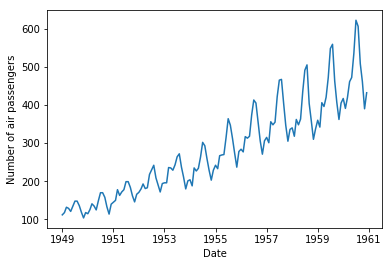

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [8]:
# Determining rolling statistics

rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

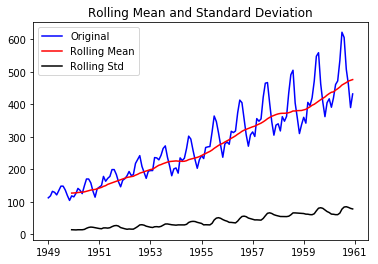

In [9]:
# Plot Rolling statistics

orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [10]:
#Perform Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test :')
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index= ['Test statistics','p-value','#Lags-used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key] = value
print(dfoutput)

C:\Users\dell\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Results of Dickey-Fuller Test :
Test statistics                  0.815369
p-value                          0.991880
#Lags-used                      13.000000
number of observations used    130.000000
Critical value(1%)              -3.481682
Critical value(5%)              -2.884042
Critical value(10%)             -2.578770
dtype: float64


In [11]:
#As the critical value is less than the test statistics,we cannot reject the null hypothesis. So, the data is not stationary.

In [12]:
#Estimating trend
indexedDataset_logscale= np.log(indexedDataset)

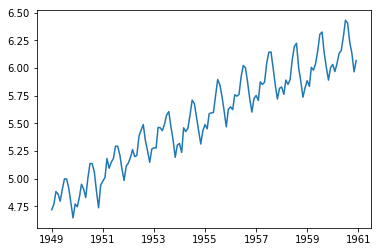

In [13]:
plt.plot(indexedDataset_logscale)

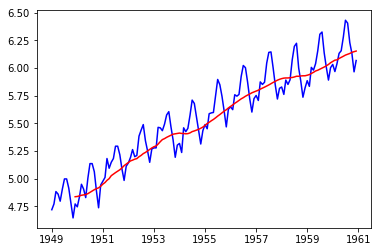

In [14]:
#Calculate moving average

movingAverage = indexedDataset_logscale.rolling(window=12).mean()

movingStd = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale,color='blue')
plt.plot(movingAverage,color='red')

In [15]:
#Data is not stationary because the mean is moving with time

In [16]:
datasetLogScaleMinusMovingAverage = indexedDataset_logscale-movingAverage
datasetLogScaleMinusMovingAverage.head(10)

#Remove null values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()

    movingStd = timeseries.rolling(window=12).std()
    
    
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
    std = plt.plot(movingStd,color='black',label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test :')
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index= ['Test statistics','p-value','#Lags-used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key] = value
    print(dfoutput)

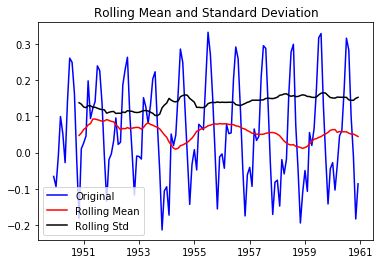

Results of Dickey-Fuller Test :
Test statistics                 -3.162908
p-value                          0.022235
#Lags-used                      13.000000
number of observations used    119.000000
Critical value(1%)              -3.486535
Critical value(5%)              -2.886151
Critical value(10%)             -2.579896
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

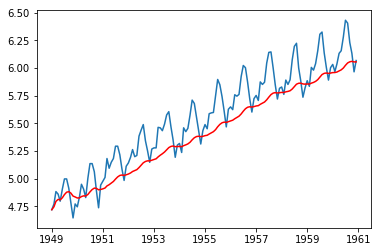

In [19]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

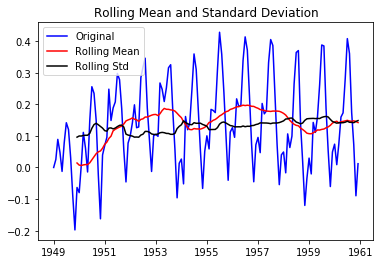

Results of Dickey-Fuller Test :
Test statistics                 -3.601262
p-value                          0.005737
#Lags-used                      13.000000
number of observations used    130.000000
Critical value(1%)              -3.481682
Critical value(5%)              -2.884042
Critical value(10%)             -2.578770
dtype: float64


In [20]:
datasetLogScaleMinusWeightedAverage = indexedDataset_logscale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusWeightedAverage)

In [21]:
#Hence, by observing the value of p and the critical values, we see that the time series is stationary.

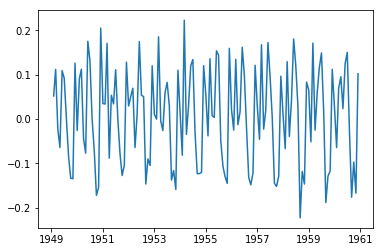

In [22]:
datasetLogDiffShifting=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

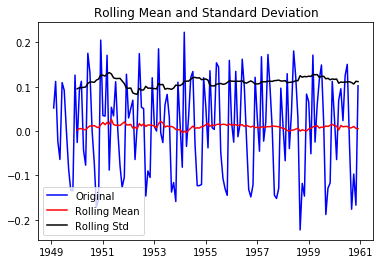

Results of Dickey-Fuller Test :
Test statistics                 -2.717131
p-value                          0.071121
#Lags-used                      14.000000
number of observations used    128.000000
Critical value(1%)              -3.482501
Critical value(5%)              -2.884398
Critical value(10%)             -2.578960
dtype: float64


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [24]:
#Time Series  is stationary

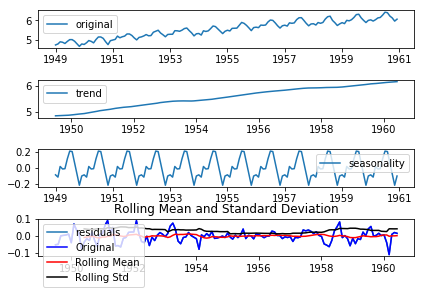

Results of Dickey-Fuller Test :
Test statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags-used                     9.000000e+00
number of observations used    1.220000e+02
Critical value(1%)            -3.485122e+00
Critical value(5%)            -2.885538e+00
Critical value(10%)           -2.579569e+00
dtype: float64


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexedDataset_logscale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

DecomposedLogData = residual
DecomposedLogData.dropna(inplace=True)
test_stationarity(DecomposedLogData)

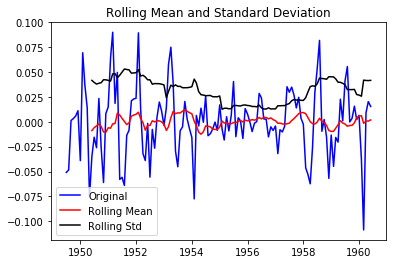

Results of Dickey-Fuller Test :
Test statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags-used                     9.000000e+00
number of observations used    1.220000e+02
Critical value(1%)            -3.485122e+00
Critical value(5%)            -2.885538e+00
Critical value(10%)           -2.579569e+00
dtype: float64


In [27]:
DecomposedLogData = residual
DecomposedLogData.dropna(inplace=True)
test_stationarity(DecomposedLogData)

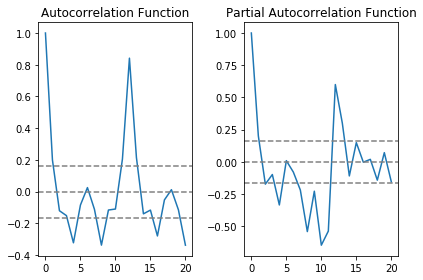

In [28]:
from statsmodels.tsa.stattools import acf,pacf


lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting AR model


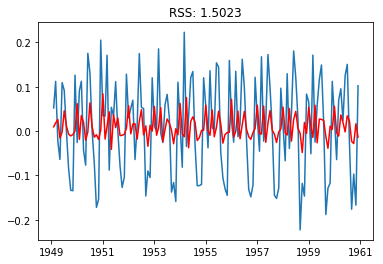

In [36]:
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model=ARIMA(indexedDataset_logscale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting MA model


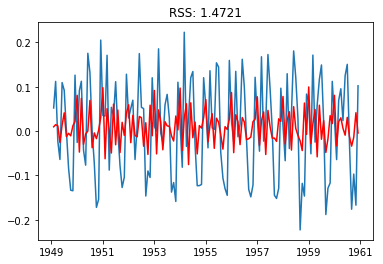

In [37]:
#MA model

model=ARIMA(indexedDataset_logscale,order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting ARIMA model


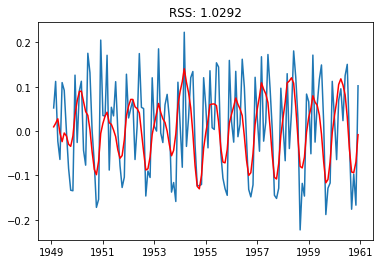

In [38]:
model=ARIMA(indexedDataset_logscale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [39]:
#ARIMA Model gives RSS=1.0292 which is quite good

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head(10))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
dtype: float64


In [41]:
#Cumulative Sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
predictions_ARIMA_log =pd.Series(indexedDataset_logscale['#Passengers'].ix[0],index=indexedDataset_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\dell\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

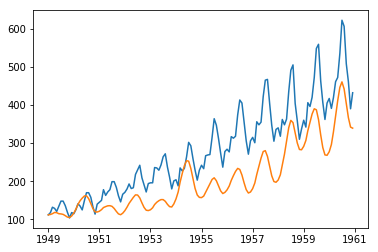

In [43]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [44]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


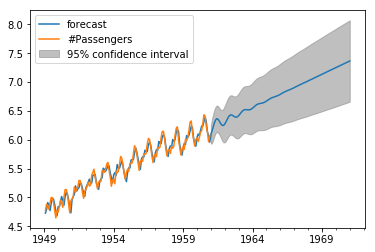

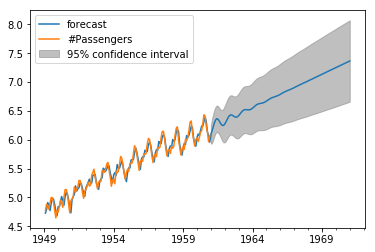

In [45]:
results_ARIMA.plot_predict(1,264)


In [46]:
results_ARIMA.forecast(steps=120)

(array([6.09553391, 6.15281399, 6.2244296 , 6.29241094, 6.34164708,
        6.36359354, 6.35784679, 6.33139299, 6.29597536, 6.2644771 ,
        6.24738322, 6.25025166, 6.27275828, 6.30940302, 6.35151482,
        6.38988643, 6.41727369, 6.43011042, 6.42906678, 6.41842479,
        6.40456145, 6.39403605, 6.39183072, 6.40019491, 6.41833679,
        6.44295393, 6.4693742 , 6.4929397 , 6.51024103, 6.51989018,
        6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
        6.53322343, 6.54812852, 6.56591539, 6.5841029 , 6.6003652 ,
        6.61313247, 6.62192761, 6.62737768, 6.63093108, 6.63438668,
        6.63937964, 6.64696483, 6.65739819, 6.67015302, 6.68414228,
        6.69806603, 6.71077877, 6.72157708, 6.73033959, 6.73749786,
        6.74386353, 6.75037297, 6.75782567, 6.76668656, 6.77699797,
        6.78841292, 6.80032826, 6.81207167, 6.82308732, 6.83307107,
        6.84202463, 6.85022283, 6.85811191, 6.8661731 , 6.8747912 ,
        6.88416272, 6.89426353, 6.90487858, 6.91